# Three-point vertex function at finite temperature

# Imports and definitions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import expand, re, I, im

import correlator as corr

In [2]:
def finite_part(expr):
    return expr.subs("eps", 0)

## Gamma at zero temperature

In [ ]:
mass = 2
masses = mass, mass, mass
qt_eucl_grid_zero_temp = np.arange(-15, 15, 0.25)
qt_grid = qt_eucl_grid_zero_temp * (-1j)

In [ ]:
zero_temp_Pi_data = [corr.zero_temp_use_psd([qt, 0, 0, 0], [qt, 0, 0, 0], *masses) for qt in qt_grid]

In [ ]:
zero_temp_Gamma_data = [expand(I * Pi_val) for Pi_val in zero_temp_Pi_data]

In [ ]:
re_Gamma_data = [re(finite_part(Gamma_val)) * 1e4 for Gamma_val in zero_temp_Gamma_data] 
im_Gamma_data = [im(finite_part(Gamma_val)) * 1e4 for Gamma_val in zero_temp_Gamma_data]
fig, ax = plt.subplots()
ax.plot(qt_eucl_grid_zero_temp, re_Gamma_data, label=r"$\mathrm{Re}\,\Gamma$", color="blue", marker=".")
ax.plot(qt_eucl_grid_zero_temp, im_Gamma_data, label=r"$\mathrm{Im}\,\Gamma$", color="red", marker=".")
ax.set_xlabel(r"$p^{0}_E$")
ax.set_ylabel(r"$\Gamma\times 10^{4}$")
ax.set_title(r"$\Gamma$ at Zero Temp. and $\vec{p}_1 = \vec{p}_2 = 0$")
ax.legend(loc="upper right")

## Dimensionless Gamma at finite temperature

### Testing the scaling behaviour

In [3]:
l_grid  = np.arange(-10, 11)
q1 = [0, 0, 0]
q2 = [0, 0, 0]
xis = 1, 1, 1
a = 0.5
n_min = -12
n_max = - n_min + 1

In [4]:
dimensionless_Gamma_data_M1 = [corr.dimensionless_Gamma_finite_temp(l, q1, l, q2, *xis, a, n_min, n_max, 1) for l in l_grid]
dimensionless_Gamma_data_M2 = [corr.dimensionless_Gamma_finite_temp(l, q1, l, q2, *xis, a, n_min, n_max, 2) for l in l_grid]
dimensionless_Gamma_data_M3 = [corr.dimensionless_Gamma_finite_temp(l, q1, l, q2, *xis, a, n_min, n_max, 3) for l in l_grid]

In [8]:
dimensionless_Gamma_plotdata_M1 = np.array([re(finite_part(x)) for x in dimensionless_Gamma_data_M1])
dimensionless_Gamma_plotdata_M2 = np.array([re(finite_part(x)) for x in dimensionless_Gamma_data_M2])
dimensionless_Gamma_plotdata_M3 = np.array([re(finite_part(x)) for x in dimensionless_Gamma_data_M3])

In [18]:
print(dimensionless_Gamma_plotdata_M1[10])
print(dimensionless_Gamma_plotdata_M2[10])
print(dimensionless_Gamma_plotdata_M3[10])

0.00387988907270133654
0.00387988930165411970
0.00387989253456580011


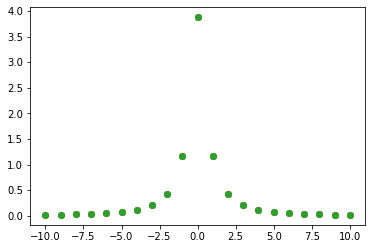

In [12]:
fig, ax = plt.subplots()
plt.scatter(l_grid, dimensionless_Gamma_plotdata_M1 * 1e3)
plt.scatter(l_grid, dimensionless_Gamma_plotdata_M2 * 1e3)
plt.scatter(l_grid, dimensionless_Gamma_plotdata_M3 * 1e3)

### Plotting the a-dependence

In [19]:
l_grid  = np.arange(-20, 21)
q1 = [0, 0, 0]
q2 = [0, 0, 0]
xis = 1, 1, 1
a_list = [0.1, 0.5, 1, 5, 10]
n_min = -20
n_max = - n_min + 1

In [20]:
# rows = len(a_list)
# cols = len(l_grid)
# dimensionless_Gamma_finite_temp_data = np.zeros(rows * cols).reshape(rows, cols)
# for r in range(rows):
#     for c in range(cols):
#         dimensionless_Gamma_finite_temp_data[r, c] =\
#             re(finite_part(corr.dimensionless_Gamma_finite_temp(l_grid[c], q1, l_grid[c], q2, *xis, a_list[r], n_min, n_max, 1)))

# np.save("dimensionless_Gamma_finite_temp_data", dimensionless_Gamma_finite_temp_data)
dimensionless_Gamma_finite_temp_data = np.load("dimensionless_Gamma_finite_temp_data.npy", allow_pickle=True)

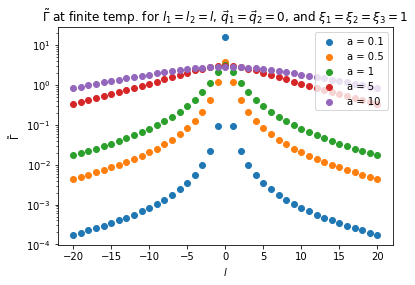

In [21]:
fig, ax = plt.subplots()
for index in range(len(a_list)):
    ax.scatter(l_grid, dimensionless_Gamma_finite_temp_data[index, :] * 1e3, label=f"a = {a_list[index]}")
ax.set_xlabel(r"$l$")
ax.set_ylabel(r"$\tilde{\Gamma}$")
ax.set_yscale("log")
ax.set_title(r"$\tilde{\Gamma}$ at finite temp. for $l_1 = l_2 = l$, $\vec{q}_1 = \vec{q}_2 = 0$, and $\xi_1 = \xi_2 = \xi_3 = 1$")
ax.legend(loc="upper right")

### Dimensionless Gamma at zero temperature

In [16]:
qt_eucl_grid = np.linspace(-15, 15, 60)
zero_temp_Gamma_data\
    = np.array([corr.dimensionless_Gamma_zero_temp([qt_eucl, 0, 0, 0], [qt_eucl, 0, 0, 0], *xis, 1) for qt_eucl in qt_eucl_grid])

In [17]:
zero_temp_Gamma_plotdata = np.array([re(finite_part(x)) for x in zero_temp_Gamma_data])

Text(0.5, 1.0, '$\\tilde{\\Gamma}$ at zero temp.')

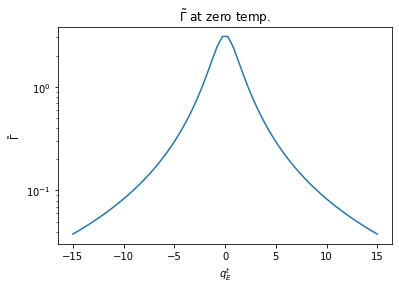

In [18]:
fig, ax = plt.subplots()
ax.plot(qt_eucl_grid, zero_temp_Gamma_plotdata * 1e3)
ax.set_xlabel(r"$q^t_E$")
ax.set_ylabel(r"$\tilde{\Gamma}$")
ax.set_yscale("log")
ax.set_title(r"$\tilde{\Gamma}$ at zero temp.")